In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
library(ggdendro)


In [3]:
library(corrplot)
library(ape)

corrplot 0.85 loaded



In [22]:
phes_f <- '../phenotypes.txt'

In [4]:
JI_f <- 'JI.tsv'

In [5]:
## functions

df_to_mat <- function(df){
    bind_rows(
        df %>% select(ji, label1, label2) %>% rename('x'='label1', 'y'='label2'),
        df %>% select(ji, label1, label2) %>% rename('y'='label1', 'x'='label2'),
        df %>% select(label1, label2) %>% gather(tmp, val) %>% select(val) %>%
        unique() %>% rename('x'='val') %>% mutate(y = x, ji = 1)
    ) %>%
    dcast(x ~ y, value.var = "ji", fill=0) %>%
    column_to_rownames('x') %>%
    as.matrix()
}


In [6]:
## constant

col1 <- colorRampPalette(c("yellow", "white","cyan", "#007FFF", "blue","#00007F"))


In [23]:
phes_f %>% fread() -> phes

In [18]:
## read the Jaccard index file

df_all <- fread(JI_f) %>%
rename('pheno1'='#pheno1')

In [19]:
png(file = "JI.png", width=2400,height=2400, units="px", family = "Helvetica")
corrplot(
    df_all  %>%
    rename(
        'ji'='JI',
        'label1'='pheno1',
        'label2'='pheno2'
    ) %>%
    df_to_mat(), 
    method = "pie", is.corr = FALSE, cl.lim = c(0,1),
    order='hclust', addrect = 10, col = col1(20),
    title='Pairwise Jaccard index cases',
    mar = c(0,0,1,0)
)
dev.off()

png 
  2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



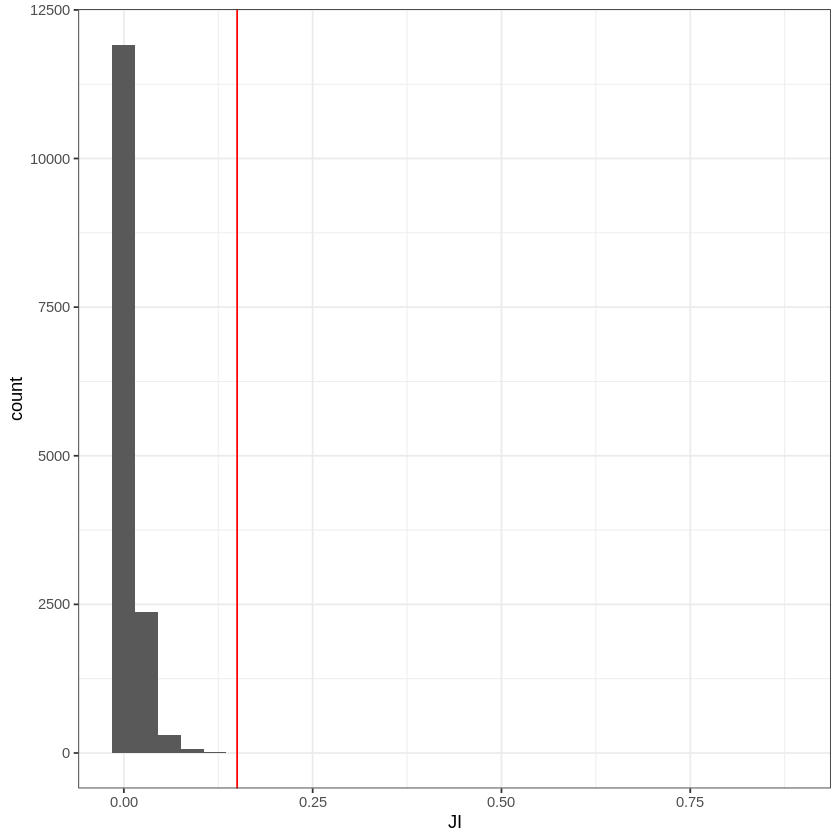

In [37]:
df_all %>%
ggplot(aes(x = JI)) +
geom_histogram() +
theme_bw() +
geom_vline(xintercept = .15, color='red')

In [38]:
df_all %>% arrange(-JI) %>%
left_join(
    phes %>% rename(
        'pheno1' = 'GBE_ID',
        'N1' = 'Cases',
        'phenoName1' = 'Name'
    ),
    by='pheno1'
) %>%
left_join(
    phes %>% rename(
        'pheno2' = 'GBE_ID',
        'N2' = 'Cases',
        'phenoName2' = 'Name'
    ),
    by='pheno2'
) %>%
filter(JI >= .15)


pheno1,pheno2,JI,N1,phenoName1,N2,phenoName2
<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<chr>
cancer1060,cancer1003,0.8757769,16789,Non-melanoma skin cancer,19168,Skin cancer
cancer1001,cancer1084,0.8286460,1981,Lung cancer,2392,Respiratory/intrathoracic cancer
BIN_FC11006152,BIN_FC1006152,0.7895923,9053,Blood clot or DVT diagnosed by doctor,7166,DVT diagnosed by doctor
HC414,HC308,0.7868852,1309,Cardiomyopathy,1096,Hypertrophic cardiomyopathy (HCM / HOCM)
cancer1047,cancer1053,0.7743161,1852,Lymphoma,1429,Non-Hodgkins lymphoma
cancer1022,cancer1020,0.7436063,3251,Colon cancer/sigmoid cancer,4382,Large bowel cancer/colorectal cancer
HC225,HC188,0.7273280,12961,Cholecystitis,14938,Cholelithiasis/gall stones
HC95,HC201,0.6139281,3783,Inflammatory bowel disease,3147,Ulcerative colitis
cancer1041,cancer1037,0.5671979,2814,Cervical cancer,4945,Female genital tract cancer


In [40]:
df_all %>% arrange(-JI) %>%
left_join(
    phes %>% rename(
        'pheno1' = 'GBE_ID',
        'N1' = 'Cases',
        'phenoName1' = 'Name'
    ),
    by='pheno1'
) %>%
left_join(
    phes %>% rename(
        'pheno2' = 'GBE_ID',
        'N2' = 'Cases',
        'phenoName2' = 'Name'
    ),
    by='pheno2'
) %>%
filter(
    ! pheno1 %in% c('RH141', 'BIN_FC1006152', 'RH110', 'RH130', 'HC308', 'HC198'),
    ! pheno2 %in% c('RH141', 'BIN_FC1006152', 'RH110', 'RH130', 'HC308', 'HC198')
) %>%
filter(JI >= .5)


pheno1,pheno2,JI,N1,phenoName1,N2,phenoName2
<chr>,<chr>,<dbl>,<int>,<chr>,<int>,<chr>
cancer1060,cancer1003,0.8757769,16789,Non-melanoma skin cancer,19168,Skin cancer
cancer1001,cancer1084,0.8286460,1981,Lung cancer,2392,Respiratory/intrathoracic cancer
cancer1047,cancer1053,0.7743161,1852,Lymphoma,1429,Non-Hodgkins lymphoma
cancer1022,cancer1020,0.7436063,3251,Colon cancer/sigmoid cancer,4382,Large bowel cancer/colorectal cancer
HC225,HC188,0.7273280,12961,Cholecystitis,14938,Cholelithiasis/gall stones
HC95,HC201,0.6139281,3783,Inflammatory bowel disease,3147,Ulcerative colitis
cancer1041,cancer1037,0.5671979,2814,Cervical cancer,4945,Female genital tract cancer
